In [1]:
import pandas as pd
import numpy as np

from tqdm import tqdm

In [2]:
fasta_thrb='MAHVRGLQLPGCLALAALCSLVHSQHVFLAPQQARSLLQRVRRANTFLEEVRKGNLERECVEETCSYEEAFEALESSTATDVFWAKYTACETARTPRDKLAACLEGNCAEGLGTNYRGHVNITRSGIECQLWRSRYPHKPEINSTTHPGADLQENFCRNPDSSTTGPWCYTTDPTVRRQECSIPVCGQDQVTVAMTPRSEGSSVNLSPPLEQCVPDRGQQYQGRLAVTTHGLPCLAWASAQAKALSKHQDFNSAVQLVENFCRNPDGDEEGVWCYVAGKPGDFGYCDLNYCEEAVEEETGDGLDEDSDRAIEGRTATSEYQTFFNPRTFGSGEADCGLRPLFEKKSLEDKTERELLESYIDGRIVEGSDAEIGMSPWQVMLFRKSPQELLCGASLISDRWVLTAAHCLLYPPWDKNFTENDLLVRIGKHSRTRYERNIEKISMLEKIYIHPRYNWRENLDRDIALMKLKKPVAFSDYIHPVCLPDRETAASLLQAGYKGRVTGWGNLKETWTANVGKGQPSVLQVVNLPIVERPVCKDSTRIRITDNMFCAGYKPDEGKRGDACEGDSGGPFVMKSPFNNRWYQMGIVSWGEGCDRDGKYGFYTHVFRLKKWIQKVIDQFGE'

In [23]:
%%time

df = pd.read_csv('data-raw/BindingDB_All.tsv',
                 sep='\t',
                 error_bad_lines=False)
df = df[df['Target Name Assigned by Curator or DataSource'].str.contains('thrombin')]
df = df.drop_duplicates(subset=['Ligand SMILES'])
df = df.dropna(subset=['Ki (nM)'])
df = df[['Ligand SMILES',
         'Target Name Assigned by Curator or DataSource',
         'Target Source Organism According to Curator or DataSource',
         'Ki (nM)',
         'BindingDB Target Chain  Sequence',
         'Number of Protein Chains in Target (>1 implies a multichain complex)']]
df = df[['Ligand SMILES', 'Ki (nM)']]
df.to_csv('bindingdb.csv', index='None')
df.shape

/var/folders/n5/wrds_wts3jq42tqpd0mjn2mr0000gn/T/ipykernel_49194/487690276.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('data-raw/BindingDB_All.tsv',
b'Skipping line 1043973: expected 193 fields, saw 205\nSkipping line 1043999: expected 193 fields, saw 205\n'
b'Skipping line 1076692: expected 193 fields, saw 205\n'
b'Skipping line 1099362: expected 193 fields, saw 265\n'
b'Skipping line 1503068: expected 193 fields, saw 241\n'
b'Skipping line 1616973: expected 193 fields, saw 241\nSkipping line 1616974: expected 193 fields, saw 241\nSkipping line 1616975: expected 193 fields, saw 241\nSkipping line 1616976: expected 193 fields, saw 241\nSkipping line 1616977: expected 193 fields, saw 241\nSkipping line 1616978: expected 193 fields, saw 241\nSkipping line 1616979: expected 193 fields, saw 241\nSkipping line 1616980: expected 193 fields, saw 241\nSkipping line 1616981: e

(4161, 2)

In [24]:
df.head()

,Ligand SMILES,Ki (nM)
22618,NC(=N)c1cccc(CN2CCN(CC2=O)S(=O)(=O)c2cc3ccc(Cl...,>4000
22619,NC(=N)c1ccc(CN2CCN(CC2=O)S(=O)(=O)c2cc3ccc(Cl)...,>4000
22620,OCCn1c(CN2CCN(CC2=O)S(=O)(=O)c2cc3ccc(Cl)cc3s2...,>4000
22621,Clc1ccc(C=CS(=O)(=O)N2CCN(Cc3cc4cnccc4[nH]3)C(...,>4000
22622,COC(=O)[C@H](Cc1cccc(c1)C(N)=N)[C@@H](C)NC(=O)...,>3000


In [27]:
def to_int(row):
    if isinstance(row, str) and not row[0].isdigit():
        return float(row[1:])
    else: return float(row)

In [28]:
df['Ki (nM)'] = df['Ki (nM)'].apply(to_int)
df.head()

,Ligand SMILES,Ki (nM)
22618,NC(=N)c1cccc(CN2CCN(CC2=O)S(=O)(=O)c2cc3ccc(Cl...,4000.0
22619,NC(=N)c1ccc(CN2CCN(CC2=O)S(=O)(=O)c2cc3ccc(Cl)...,4000.0
22620,OCCn1c(CN2CCN(CC2=O)S(=O)(=O)c2cc3ccc(Cl)cc3s2...,4000.0
22621,Clc1ccc(C=CS(=O)(=O)N2CCN(Cc3cc4cnccc4[nH]3)C(...,4000.0
22622,COC(=O)[C@H](Cc1cccc(c1)C(N)=N)[C@@H](C)NC(=O)...,3000.0


<AxesSubplot:>

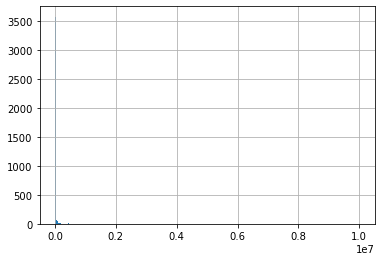

In [30]:
df['Ki (nM)'].hist(bins=500)

In [31]:
df['log10Ki'] = df['Ki (nM)'].apply(np.log10)

<AxesSubplot:>

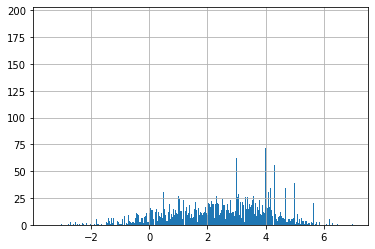

In [32]:
df['log10Ki'].hist(bins=500)

In [33]:
df['active'] = 1
df.loc[df['Ki (nM)'] > 10000, 'active'] = 0
df.sample()

,Ligand SMILES,Ki (nM),log10Ki,active
1149566,NC(=N)c1cccc(Oc2ccc(C(O)=O)c(Oc3cccc(c3)C(N)=N...,100000.0,5.0,0


In [34]:
df.sample(10)

,Ligand SMILES,Ki (nM),log10Ki,active
1802683,NC(=N)N1CCC(CC1)Oc1ccc(cc1)C(Oc1ccc2CCN(Cc2c1)...,100000.00,5.000000,0
1199411,Cc1cc(-c2cc3cc(ccc3[nH]2)C(N)=N)c(O)c(c1)-c1cc...,4000.00,3.602060,1
25377,CN[C@H](Cc1ccccc1)C(=O)N1CCC[C@H]1C(=O)N[C@@](...,430.00,2.633468,1
1818661,NC(=N)c1cccc(c1)-n1cc(Br)cc1C(=O)Nc1ccc(cc1)-c...,300.00,2.477121,1
1116235,N[C@H]1CC[C@@H](CC1)NC(=O)c1cc(OCc2ccc(cc2)C(N...,1642.00,3.215373,1
1153563,COC(=O)CC1(CC(=NO1)c1cccc(c1)C(N)=N)C(=O)Nc1nc...,14000.00,4.146128,0
1693452,COC(=O)Nc1ccc2-c3c[nH]c(n3)[C@H](C\C=C\CCC(=O)...,11500.00,4.060698,0
1975664,NC(=[NH2+])c1ccc(cc1)S(=O)(=O)NCCCC(=O)Nc1cccc...,201000.00,5.303196,0
24544,Cc1ccc(cc1OCCc1ccc(Cl)cc1Cl)C(=O)NCC1CCN(CC1)c...,4866.00,3.687172,1
1495026,Cl.CC1(C)[C@H]2C[C@@H]1[C@]1(C)OB(O[C@@H]1C2)[...,0.27,-0.568636,1


In [35]:
df.to_csv('bindingdb.csv', index=False)